In [1]:
import torch
from coati.models.io import load_e3gnn_smiles_clip_e2e

encoder, tokenizer = load_e3gnn_smiles_clip_e2e(
    freeze=True,
    device=torch.device("cuda:0"),
    doc_url="s3://terray-public/models/grande_closed.pkl",
)

Loading model from s3://terray-public/models/grande_closed.pkl
Loading tokenizer may_closedparen from s3://terray-public/models/grande_closed.pkl
number of parameters: 12.64M
number of parameters Total: 2.44M xformer: 17.92M Total: 20.36M 
vocab_name not found in tokenizer_vocabs, trying to load from file
Freezing encoder
20561664 params frozen!


In [2]:
print(encoder)
print()
print(tokenizer)

e3gnn_smiles_clip_e2e(
  (point_encoder): e3gnn_clip(
    (act_fn): SiLU()
    (embedding): Linear(in_features=28, out_features=256, bias=True)
    (embedding_norm): InstanceNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (node_dec): Sequential(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): SiLU()
      (2): Identity()
      (3): Linear(in_features=256, out_features=256, bias=True)
    )
    (gcl_0): e_gcl_sparse(
      (instance_norm): InstanceNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (edge_mlp): Sequential(
        (0): Linear(in_features=513, out_features=256, bias=True)
        (1): SiLU()
        (2): Identity()
        (3): Linear(in_features=256, out_features=256, bias=True)
        (4): SiLU()
        (5): Identity()
      )
      (node_mlp): Sequential(
        (0): Linear(in_features=512, out_features=256, bias=True)
        (1): SiLU()
        (2): Identity()
        (3):

In [3]:
import pandas as pd

mol_df = pd.read_csv('input_data/molecules_solvents.csv')
mol_df.head()

msl_df = mol_df[['Chromophore', 'Solvent', 'Quantum yield']]
msl_df.head()

,Chromophore,Solvent,Quantum yield
0,N#Cc1cc2ccc(O)cc2oc1=O,O,NaN
1,N#Cc1cc2ccc([O-])cc2oc1=O,O,NaN
2,CCCCCCCCCCCC#CC#CCCCCCCCCCN1C(=O)c2ccc3c4ccc5c...,ClC(Cl)Cl,NaN
3,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,CC#N,NaN
4,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,CS(C)=O,NaN


In [4]:
print(len(msl_df))
msl_df.isna().sum()

20236


Chromophore         0
Solvent             0
Quantum yield    6399
dtype: int64

In [5]:
msl_df = msl_df.dropna()
print(msl_df.isna().sum())
print(len(msl_df))
msl_df.head()

Chromophore      0
Solvent          0
Quantum yield    0
dtype: int64
13837


,Chromophore,Solvent,Quantum yield
34,O=C([O-])c1ccccc1-c1c2ccc(=O)cc-2oc2cc([O-])ccc12,O,0.950
43,O=C([O-])c1ccccc1C1=c2cc3c4c(c2Oc2c1cc1c5c2CCC...,CO,1.000
71,O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(...,O,0.200
72,O=C([O-])c1ccccc1-c1c2cc(I)c(=O)c(I)c-2oc2c(I)...,O,0.020
73,O=C([O-])c1c(Cl)c(Cl)c(Cl)c(Cl)c1-c1c2cc(I)c(=...,O,0.018


In [7]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import MolToImage

mol_list = []

for smile in msl_df['Chromophore']:
    mol = Chem.MolFromSmiles(smile)
    print(type(mol))
    mol_list.append(mol)
    print(f"Num of atoms: {mol.GetNumAtoms()}")
    print(f"Mol weight: {Descriptors.MolWt(mol)}")
    print('------------------------------------------------')

<class 'rdkit.Chem.rdchem.Mol'>
Num of atoms: 25
Mol weight: 330.295
------------------------------------------------
<class 'rdkit.Chem.rdchem.Mol'>
Num of atoms: 37
Mol weight: 490.6030000000005
------------------------------------------------
<class 'rdkit.Chem.rdchem.Mol'>
Num of atoms: 29
Mol weight: 645.879
------------------------------------------------
<class 'rdkit.Chem.rdchem.Mol'>
Num of atoms: 29
Mol weight: 833.879
------------------------------------------------
<class 'rdkit.Chem.rdchem.Mol'>
Num of atoms: 33
Mol weight: 971.659
------------------------------------------------
<class 'rdkit.Chem.rdchem.Mol'>
Num of atoms: 29
Mol weight: 645.879
------------------------------------------------
<class 'rdkit.Chem.rdchem.Mol'>
Num of atoms: 29
Mol weight: 833.879
------------------------------------------------
<class 'rdkit.Chem.rdchem.Mol'>
Num of atoms: 33
Mol weight: 971.659
------------------------------------------------
<class 'rdkit.Chem.rdchem.Mol'>
Num of atoms: 

In [24]:
imgs_2d = []

for mol in mol_list:
    img = MolToImage(mol)
    imgs_2d.append(img)
    print(type(img))

imgs_2d[0].show()

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.PngImagePlugin.PngImag

In [6]:
print(len(mol_list)) 
msl_df.head()

NameError: name 'mol_list' is not defined

In [33]:
from coati.generative.coati_purifications import embed_smiles

vecs = []   

for smile in msl_df['Chromophore']:
    frag_vecs = []
    if '.' in smile:
        fragments = smile.split('.')
        for frag in fragments:
            vec = embed_smiles(frag, encoder, tokenizer)
            frag_vecs.append(vec)
        
        if len(frag_vecs) > 0:
            fused_emb = torch.mean(torch.stack(frag_vecs), dim=0)
            vecs.append(fused_emb)
    else:
        vec = embed_smiles(smile, encoder, tokenizer)
        vecs.append(vec)

print(len(vecs))
vecs = torch.stack(vecs)
print(vecs.shape)

KeyboardInterrupt: 

In [23]:
torch.cuda.empty_cache()
vecs = vecs.to("cpu")

torch.save(vecs, "mol_embs.pt")

In [34]:
from coati.generative.coati_purifications import embed_smiles

vecs_sols = []

for sol in msl_df['Solvent']:
    vec_s = embed_smiles(sol, encoder, tokenizer)
    vecs_sols.append(vec_s)

print(len(vecs_sols))
vecs_sols = torch.stack(vecs_sols)
print(vecs_sols.shape)

: 

In [8]:
torch.cuda.empty_cache()
vecs_sols = vecs_sols.to("cpu")

torch.save(vecs_sols, "sol_embs.pt")

In [6]:
vecs_mols = torch.load("torch_data/mol_embs.pt", map_location="cpu")
print(vecs_mols.shape)

vecs_sols = torch.load("torch_data/sol_embs.pt", map_location="cpu")
print(vecs_sols.shape)

torch.Size([13837, 256])
torch.Size([13837, 256])


C:\Users\kappa\AppData\Local\Temp\ipykernel_23092\897032716.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vecs_mols = torch.load("torch_data/mol_embs.pt", map_location

In [7]:
X = torch.cat([vecs_mols, vecs_sols], dim=1)
print(X.shape)

torch.Size([13837, 512])


In [8]:
y = torch.tensor(msl_df['Quantum yield'].values)
print(X.shape, y.shape)

torch.Size([13837, 512]) torch.Size([13837])


In [9]:
df_embs = pd.DataFrame({"embeddings": [x.numpy() for x in X], "label": y.numpy()})
df_embs.to_csv('emb_data.csv', index=False)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

X_np = X.cpu().numpy()
y_np = y.cpu().numpy()

X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11069, 512) (2768, 512) (11069,) (2768,)


In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    max_iter=2000,
    warm_start=True,
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print(f"R Squared: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

R Squared: 0.580
RMSE: 0.199


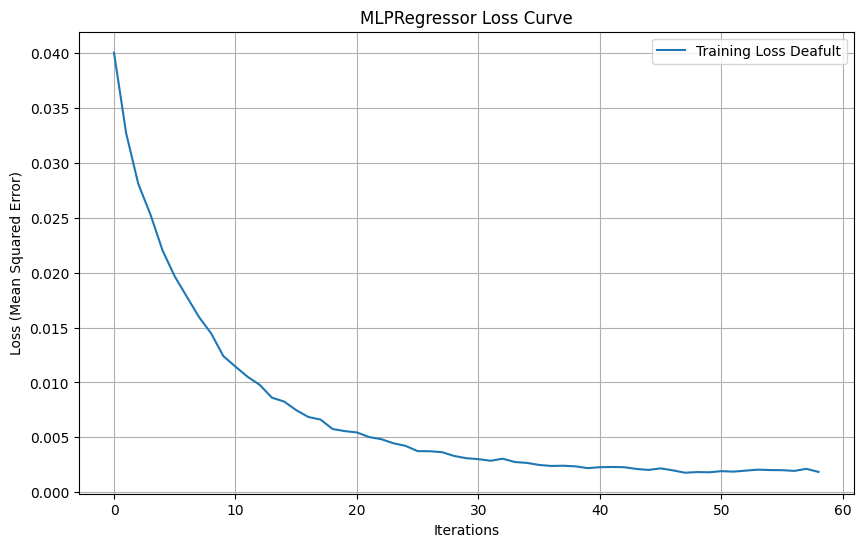

In [13]:
import matplotlib.pyplot as plt

training_loss = mlp.loss_curve_

plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss Deafult')
plt.title('MLPRegressor Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=4,
    reg_lambda=2.0,
    reg_alpha=0.2,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50,
    tree_method="hist"
)

eval_set = [(X_train, y_train), (X_test, y_test)]

xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print(f"R Squared: {r2_score(y_test, y_pred_xgb):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.3f}")

R Squared: 0.665
RMSE: 0.178


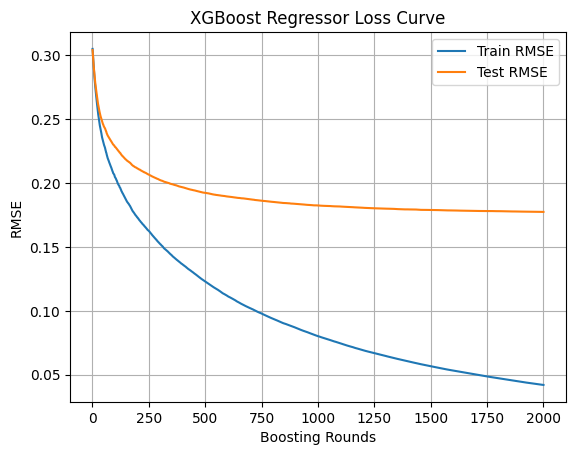

In [15]:
import matplotlib.pyplot as plt

results = xgb_model.evals_result()
epochs = range(1, len(results['validation_0']['rmse']) + 1)

fig, ax = plt.subplots()
ax.plot(epochs, results['validation_0']['rmse'], label='Train RMSE')
ax.plot(epochs, results['validation_1']['rmse'], label='Test RMSE')
ax.legend()

plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost Regressor Loss Curve')
plt.grid(True)
plt.show()

In [16]:
y_train_pred = xgb_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test  R²:", r2_score(y_test, y_pred_xgb))

Train R²: 0.9813427691634166
Test  R²: 0.665366675362666


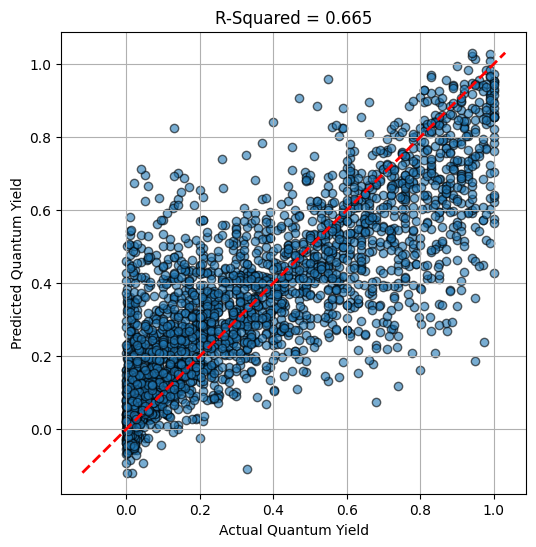

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, edgecolor='k')

min_val = min(min(y_test), min(y_pred_xgb))
max_val = max(max(y_test), max(y_pred_xgb))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel("Actual Quantum Yield")
plt.ylabel("Predicted Quantum Yield")
plt.title(f"R-Squared = {r2_score(y_test, y_pred_xgb):.3f}")
plt.grid(True)
plt.show()


In [10]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=2000, learning_rate=0.1)

eval_set = [(X_train, y_train), (X_test, y_test)]

lgb_model.fit(X_train, y_train, eval_set=eval_set, eval_metric="rmse", callbacks=[lgb.early_stopping(stopping_rounds=50)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123361
[LightGBM] [Info] Number of data points in the train set: 11069, number of used features: 512
[LightGBM] [Info] Start training from score 0.347005
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1486]	training's rmse: 0.0159719	training's l2: 0.000255103	valid_1's rmse: 0.179441	valid_1's l2: 0.032199


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,2000
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [12]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_lgb = lgb_model.predict(X_test)
print(f"R Squared: {r2_score(y_test, y_pred_lgb):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lgb)):.3f}")

R Squared: 0.658
RMSE: 0.179


c:\Users\kappa\OneDrive\Documents\GitHub\COATI\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [13]:
y_train_pred_lgb = lgb_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_train_pred_lgb))
print("Test  R²:", r2_score(y_test, y_pred_lgb))

Train R²: 0.9973126130161934
Test  R²: 0.6580615751591076


c:\Users\kappa\OneDrive\Documents\GitHub\COATI\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


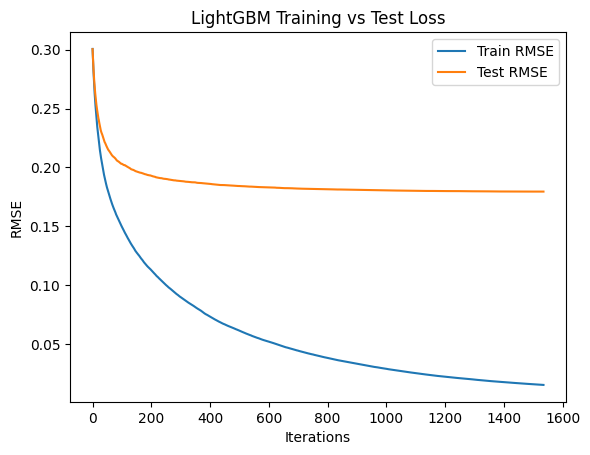

In [15]:
import matplotlib.pyplot as plt

results_lgb = lgb_model.evals_result_

train_rmse = results_lgb['training']['rmse']
test_rmse = results_lgb['valid_1']['rmse']

plt.plot(train_rmse, label="Train RMSE")
plt.plot(test_rmse, label="Test RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("LightGBM Training vs Test Loss")
plt.legend()
plt.show()

### **Cross-Attention + Fingerprints**

In [22]:
import torch.nn as nn

class CrossAttention(nn.Module):
    def __init__(self, dim_m, dim_s, heads=4, dim_out=256):
        super().__init__()
        self.attn_ms = nn.MultiheadAttention(embed_dim=dim_m, num_heads=heads, batch_first=True)
        self.attn_sm = nn.MultiheadAttention(embed_dim=dim_s, num_heads=heads, batch_first=True)
        self.linear = nn.Linear(dim_m + dim_s, dim_out)

    def forward(self, mol, sol):
        mol = mol.unsqueeze(1)
        sol = sol.unsqueeze(1)

        mol2sol, _ = self.attn_ms(mol, sol, sol)
        sol2mol, _ = self.attn_sm(sol, mol, mol)

        f = torch.cat([mol2sol.squeeze(1), sol2mol.squeeze(1)], dim=1)
        return self.linear(f)

In [23]:
CA = CrossAttention(256, 256)
X_ca = CA(vecs_mols, vecs_sols)
print(X_ca.shape)

torch.Size([13837, 256])


In [24]:
y_ca = torch.tensor(msl_df['Quantum yield'].values)
print(X_ca.shape, y_ca.shape)

torch.Size([13837, 256]) torch.Size([13837])


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

X_ca_np = X_ca.detach().cpu().numpy()
y_ca_np = y_ca.cpu().numpy()

X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(X_ca_np, y_ca_np, test_size=0.2, random_state=42)
print(X_train_ca.shape, X_test_ca.shape, y_train_ca.shape, y_test_ca.shape)

(11069, 256) (2768, 256) (11069,) (2768,)


In [30]:
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32, 16),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    max_iter=2000,
    warm_start=True,
    random_state=42
)

mlp.fit(X_train_ca, y_train_ca)

y_ca_mlp = mlp.predict(X_test_ca)
print(f"R Squared: {r2_score(y_test_ca, y_ca_mlp):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_ca, y_ca_mlp)):.3f}")

R Squared: 0.506
RMSE: 0.216


In [31]:
eval_set2 = [(X_train_ca, y_train_ca), (X_test_ca, y_test_ca)]

xgb_model.fit(X_train_ca, y_train_ca, eval_set=eval_set2, verbose=False)

y_ca_xgb = xgb_model.predict(X_test_ca)
print(f"R Squared: {r2_score(y_test_ca, y_ca_xgb):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_ca, y_ca_xgb)):.3f}")

R Squared: 0.518
RMSE: 0.213


In [32]:
lgb_model.fit(X_train_ca, y_train_ca, eval_set=eval_set2, eval_metric="rmse", callbacks=[lgb.early_stopping(stopping_rounds=50)])

y_ca_lgb = lgb_model.predict(X_test_ca)
print(f"R Squared: {r2_score(y_test_ca, y_ca_lgb):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_ca, y_ca_lgb)):.3f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65280
[LightGBM] [Info] Number of data points in the train set: 11069, number of used features: 256
[LightGBM] [Info] Start training from score 0.347005
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1976]	training's rmse: 0.00691986	training's l2: 4.78845e-05	valid_1's rmse: 0.216085	valid_1's l2: 0.0466929
R Squared: 0.504
RMSE: 0.216


c:\Users\kappa\OneDrive\Documents\GitHub\COATI\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
